# Decision Trees

Asking questions is a great way to get information about something you’re trying to identify. There are several classic games based on this process, like 20 Questions or Guess Who. In these games you’re usually asking questions to a _person_. You can also ask questions about a _dataset_. Does an observation have this particular feature? Is its value above a specific threshold? Each question you ask gives you more information about the observation you’re investigating. 

This kind of process is the basis of a genre of model called __Decision Trees__, which we’ll introduce here

In [0]:
import pandas as pd 
import numpy as np
import scipy
import matplotlib.pyplot as plt

Dataset questions are "nodes"
Nodes are either root nodes (first node), interior nodes (follow up questions), or leaf nodes (ending points).


All non-leaf nodes have a "rule" which is the question. The links between nodes are called branches or paths.

"Decisions" are typically binary, either "yes" or "no". A decision tree is a series of rules to arrive at a conclusion.

Information theory: information gain and entropy

Entropy: in data science it means uncertainty and can be defined as:

$$ H = -\sum_{i=1}^n P(x_i)log_2 P(x_i) $$

Which is the weighted sum of log base 2 of the probabilities of all outcomes. This measures the uncertainty of the outcome. As entropy decreases, confidence increases.

An area of the tree with only one outcome as zero entropy.

We can then use entropy as a measure of info gain because the change in entropy from start to finish should increase our info and lower uncertainty. One method to do this is to gain the most info as quickly as possible.

Example:

We're interested in whether a customer is likely to come back within 30 days. Here we have a snapshot of our customer base from some moment more than thirty days in the past. We have purchase amount, number of items purchased, if they used a promo on their purchase, if they're subscribed to our email list, and how many times they have made a purchase

In [0]:
customers = pd.DataFrame()
customers['purchases_amount'] = [105, 65, 89, 99, 149, 102, 34, 120, 129, 39,
                                 20, 30, 109, 40, 55, 100, 23, 20, 70, 10]
customers['purchases_items'] = [1, 4, 5, 4, 7, 1, 2, 10, 6, 5,
                                1, 3, 2, 1, 5, 10, 3, 3, 1, 1]
customers['promo'] = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
                      1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
customers['email_list'] = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
                           0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
customers['checkouts'] = [1, 5, 3, 3, 1, 2, 4, 4, 1, 1,
                          1, 1, 2, 4, 1, 1, 2, 1, 1, 1]

repeat_customer = pd.DataFrame()
repeat_customer['repeat'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                             0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [0]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

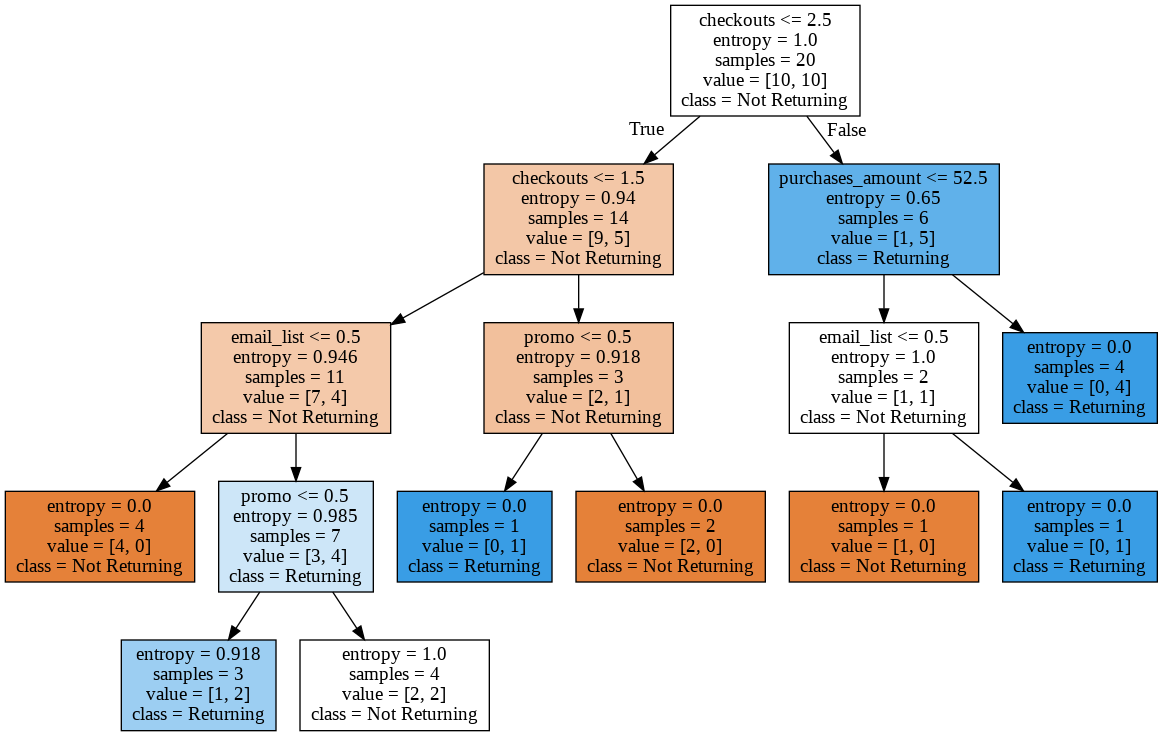

In [4]:
#initialize and train tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)

decision_tree.fit(customers,repeat_customer)

#Render our tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
#use google colab for this

Every node shows the rule being applied. 1:Certain, 2:Uncertain

Note that we set a few parameters when we initialized our tree. Firstly, we wanted to use entropy to build the tree (criterion='entropy'), which follows the method we described above of looking for information gain. We also set max_features to 1, meaning only one feature will be used per node. We set the max_depth of the tree to 4, which means we only have four decision levels below the root for our classification.


We did something in this example that you wouldn't ever do when using decision trees for real: we set random_state to an arbitrary integer (1337). This classifier works by repeatedly splitting the training data randomly, which can lead to inconsistent trees. We're setting the random seed so the tree looks a specific way for this assignment, but you wouldn't do that when actually using this model.

You can also follow trees. As you move down a tree to the left you are meeting the rule, to the right you are outside of the rule. So in the branches below the root node, all nodes to the left have a checkouts value less than or equal to 2.5 and all the nodes to the right have a checkouts value that isn't less than or equal to .2.5. You can follow this all the way down the tree, and the same is true for each new rule introduced at each node.

## Why Decision Trees?

There are several reasons someone would want to use a decision tree. Some of the benefits include:

* Easy to represent the model visually
* Can handle varied types of data
* Feature selection is a part of the model
* Easy to use with little data preparation

Downsides = 

* randomness which leads to variance and inconsistency
* prone to overfit
* they favor the dominant class so balanced data is needed